In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
df=pd.read_csv('/content/stock prices.csv')

In [ ]:
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [ ]:
df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [ ]:
df['open'].fillna(df['open'].median(),inplace=True)
df['high'].fillna(df['high'].median(),inplace=True)
df['low'].fillna(df['low'].median(),inplace=True)
df['close'].fillna(df['close'].median(),inplace=True)
df['volume'].fillna(df['volume'].median(),inplace=True)



In [ ]:
df.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [ ]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [ ]:
Date_Sum = df.groupby('date').sum()
Date_Sum['volume'][[Date_Sum['volume'].idxmax(axis=0)]]

<ipython-input-8-e77d7780b193>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Date_Sum = df.groupby('date').sum()


date
2015-08-24    4607945196
Name: volume, dtype: int64

In [ ]:
Highest_Traded = df.loc[df['date']=='2014-03-21']
Highest_Traded

,symbol,date,open,high,low,close,volume
26082,AAL,2014-03-21,36.7600,36.8200,35.9100,36.1100,14113193
26083,AAPL,2014-03-21,75.9899,76.2499,75.1899,76.1242,93612169
26084,AAP,2014-03-21,125.5800,127.9199,124.3100,126.3300,1985663
26085,ABBV,2014-03-21,54.2200,54.7300,53.0900,53.4600,12930499
26086,ABC,2014-03-21,66.5500,66.6300,64.5600,64.8200,3534843
...,...,...,...,...,...,...,...
26560,XYL,2014-03-21,36.6400,36.7600,36.2500,36.2800,2900585
26561,YUM,2014-03-21,76.0000,76.7000,75.2300,75.2700,2980691
26562,ZBH,2014-03-21,95.5200,95.6500,93.3200,93.5400,1229657
26563,ZION,2014-03-21,32.5500,32.5500,30.8800,31.2400,15681067


In [ ]:
Symbol_Sum = Highest_Traded.groupby('symbol').sum()
Symbol_Sum

<ipython-input-10-53c7026a2d97>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Symbol_Sum = Highest_Traded.groupby('symbol').sum()


,open,high,low,close,volume
symbol,,,,,
A,57.1800,57.7800,55.9600,56.0900,2762931
AAL,36.7600,36.8200,35.9100,36.1100,14113193
AAP,125.5800,127.9199,124.3100,126.3300,1985663
AAPL,75.9899,76.2499,75.1899,76.1242,93612169
ABBV,54.2200,54.7300,53.0900,53.4600,12930499
...,...,...,...,...,...
XYL,36.6400,36.7600,36.2500,36.2800,2900585
YUM,76.0000,76.7000,75.2300,75.2700,2980691
ZBH,95.5200,95.6500,93.3200,93.5400,1229657


In [ ]:
Symbol_Sum.sort_values('volume',ascending=False).head()

,open,high,low,close,volume
symbol,,,,,
BAC,18.0300,18.0300,17.5600,17.5600,156026291
CSCO,21.9400,22.1000,21.5800,21.6400,97377342
AAPL,75.9899,76.2499,75.1899,76.1242,93612169
MSFT,40.7200,40.9400,40.0100,40.1600,80731942
PFE,32.3300,32.4900,31.4601,32.1800,62719258


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.dayofweek
df.head()

,symbol,date,open,high,low,close,volume,day
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,3
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,3
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,3
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,3
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,3


In [ ]:
Day_Mean = df.groupby('day').mean()
Day_Mean

<ipython-input-13-bc624f7d6782>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Day_Mean = df.groupby('day').mean()


,open,high,low,close,volume
day,,,,,
0,86.316806,87.082099,85.533313,86.322181,4.031172e+06
1,86.250292,87.021368,85.468851,86.271991,4.188689e+06
2,86.375723,87.173028,85.556721,86.415754,4.298572e+06
3,86.307328,87.112926,85.486092,86.324814,4.299304e+06
4,86.509195,87.270451,85.717384,86.509309,4.435782e+06


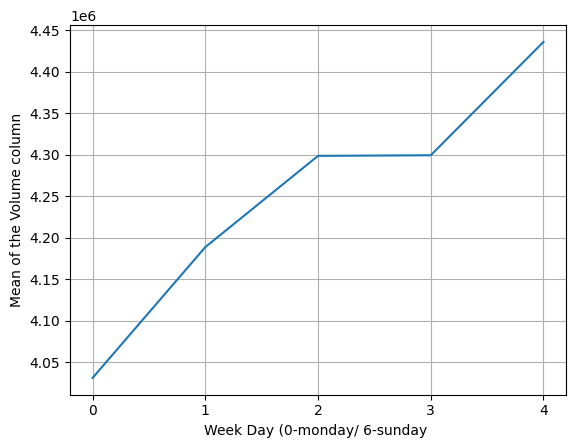

In [ ]:
x = range(0,5)
plt.plot(x,Day_Mean['volume'])
plt.ylabel('Mean of the Volume column')
plt.xlabel('Week Day (0-monday/ 6-sunday ')
plt.xticks(x)
plt.grid()
plt.show()

In [ ]:
Amazon_data = df.loc[df["symbol"]=="AMZN"]
Amazon_data

,symbol,date,open,high,low,close,volume,day
37,AMZN,2014-01-02,398.80,399.36,394.02,397.97,2140246,3
520,AMZN,2014-01-03,398.29,402.71,396.22,396.44,2213512,4
1003,AMZN,2014-01-06,395.85,397.00,388.42,393.63,3172207,0
1486,AMZN,2014-01-07,395.04,398.47,394.29,398.03,1916684,1
1969,AMZN,2014-01-08,398.47,403.00,396.04,401.92,2316903,2
...,...,...,...,...,...,...,...,...
494984,AMZN,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,4
495489,AMZN,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,1
495994,AMZN,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,2
496499,AMZN,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,3


In [ ]:
Amazon_data['volatility'] = Amazon_data['high'] - Amazon_data['low']
Amazon_data.head()

<ipython-input-16-c01d9f69e274>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amazon_data['volatility'] = Amazon_data['high'] - Amazon_data['low']


,symbol,date,open,high,low,close,volume,day,volatility
37,AMZN,2014-01-02,398.80,399.36,394.02,397.97,2140246,3,5.34
520,AMZN,2014-01-03,398.29,402.71,396.22,396.44,2213512,4,6.49
1003,AMZN,2014-01-06,395.85,397.00,388.42,393.63,3172207,0,8.58
1486,AMZN,2014-01-07,395.04,398.47,394.29,398.03,1916684,1,4.18
1969,AMZN,2014-01-08,398.47,403.00,396.04,401.92,2316903,2,6.96


In [ ]:
Amazon_data.sort_values("volatility",ascending=False)

,symbol,date,open,high,low,close,volume,day,volatility
426023,AMZN,2017-06-09,1012.50,1012.99,927.00,978.31,7647692,4,85.99
354027,AMZN,2016-11-10,778.81,778.83,717.70,742.38,12746994,3,61.13
475315,AMZN,2017-10-27,1058.14,1105.58,1050.55,1100.95,16565021,4,55.03
190913,AMZN,2015-07-24,578.99,580.57,529.35,529.42,21909381,4,51.22
486403,AMZN,2017-11-29,1194.80,1194.80,1145.19,1161.27,9257512,2,49.61
...,...,...,...,...,...,...,...,...,...
149299,AMZN,2015-03-24,373.99,375.24,372.27,374.09,2228214,1,2.97
121946,AMZN,2014-12-31,311.55,312.98,310.01,310.35,2057766,2,2.97
110722,AMZN,2014-11-26,333.78,334.65,331.75,333.57,1985949,2,2.90
50346,AMZN,2014-06-03,305.75,307.92,305.07,307.19,2379273,1,2.85


# **Summarization of the analysis**

1. 2015-08-24 saw the largest overall trading volume. 24th August, 2015 was the day of the 'flash crash'. World stock markets were down substantially. This is probably why this day has the largest overall trading volume. AAL and AAPL were the two most traded stocks of the day.

2. Volume tends to be highest on Fridays and lowest on Mondays. Monday is the first day of the week so factors such as investors' moods being gloomy on going back to work and due to the large amounts of bad news released in the weekends cause people to trade less on this day.

3. Amazon saw the most volatility on 2017-06-09. It was a Friday and as it was the last day of the week, people might have sold more shares than purchased, so price fell substantially. We can tell this as the lowest price that day was much lower than lowest price of previous day whereas highest price was quite the same.